In [26]:
# Imports
import os
import sys
import pandas as pd

In [30]:
# Swap to directory
address = '\\'.join(os.getcwd().split(
    '\\')[:-2]) + '\\Data' + '\\Patinent001-2019-12-05' + '\\ftap-forearm' + '\\'

directory = os.listdir(address)

for ix, v in enumerate(directory):
    print(str(ix) + '. ' + v)

0. ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Accelerometer_1.4.5.csv
1. ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Gyroscope_1.4.5.csv
2. ftap-lvl1-forearm_S2_2019-12-10T14.18.34.621_C49948A1895C_Accelerometer_1.4.5.csv
3. ftap-lvl1-forearm_S2_2019-12-10T14.18.34.621_C49948A1895C_Gyroscope_1.4.5.csv
4. ftap-lvl2-forearm _S2_2019-12-18T11.44.32.751_C49948A1895C_Accelerometer_1.4.5.csv
5. ftap-lvl2-forearm _S2_2019-12-18T11.44.32.751_C49948A1895C_Gyroscope_1.4.5.csv
6. ftap-lvl3-forearm_S2_2019-12-18T11.51.23.290_C49948A1895C_Accelerometer_1.4.5.csv
7. ftap-lvl3-forearm_S2_2019-12-18T11.51.23.290_C49948A1895C_Gyroscope_1.4.5.csv
8. ftap-lvl4-forearm_S2_2019-12-18T11.57.37.574_C49948A1895C_Accelerometer_1.4.5.csv
9. ftap-lvl4-forearm_S2_2019-12-18T11.57.37.574_C49948A1895C_Gyroscope_1.4.5.csv


In [34]:
# Select interested data from index
# This is hard-coded to be accelerometer data because we are interested in them as a set, at least for this notebook
# The next index is automatically used as 'gyroscope data'
accel_data_index = 0

gyro_data_index = accel_data_index

# Checks
assert 'accelerometer' in directory[accel_data_index].lower(), 'Selected data is not accelerometer data.'
assert gyro_data_index < len(directory), 'Selected data is out of bounds.'

# Parse metadata into dataframe
data = {}

for t in [
    ('accel', accel_data_index),
    ('gyro', gyro_data_index)
]:
    # Filename
    data[t[0]] = {
        'filename': directory[t[1]],
    }
    
    # Address
    data[t[0]]['address'] = address + data[t[0]]['filename']
    
    # Dataframe
    df = pd.read_csv(data[t[0]]['address'])
    
    
#     data[t[0]]['df'] = 

data

{'accel': {'filename': 'ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Accelerometer_1.4.5.csv',
  'address': "D:\\Development\\_git_Parkinson's Disease Sensors\\Parkinson-Disease-Repository\\Data\\Patient001-2019-12-05\\ftap-forearm\\ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Accelerometer_1.4.5.csv"},
 'gyro': {'filename': 'ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Accelerometer_1.4.5.csv',
  'address': "D:\\Development\\_git_Parkinson's Disease Sensors\\Parkinson-Disease-Repository\\Data\\Patient001-2019-12-05\\ftap-forearm\\ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Accelerometer_1.4.5.csv"}}

In [1]:
# Obtain accel and gyro set of signal data for first test
import os
import sys

address = '\\'.join(os.getcwd().split(
    '\\')[:-2]) + '\\Data' + '\\Patient001-2019-12-05' + '\\ftap-forearm'

directory = os.listdir(address)

accel_addr = address + '\\' + directory[0]
gyro_addr = address + '\\' + directory[1]

print(accel_addr)
print(gyro_addr)

D:\Development\Parkinson's Disease Sensors\Parkinson-Disease-Repository\Data\Patient001-2019-12-05\ftap-forearm\ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Accelerometer_1.4.5.csv
D:\Development\Parkinson's Disease Sensors\Parkinson-Disease-Repository\Data\Patient001-2019-12-05\ftap-forearm\ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Gyroscope_1.4.5.csv


In [2]:
# Parse into dataframe
import pandas as pd

accel_df = pd.read_csv(accel_addr)
gyro_df = pd.read_csv(gyro_addr)

# Extract relevant columns
accel_df = accel_df.loc[:, [accel_df.columns[t] for t in [2, 3, 4, 5]]]
gyro_df = gyro_df.loc[:, [gyro_df.columns[t] for t in [2, 3, 4, 5]]]

In [3]:
# Add integrated gyro df
gyro_pos_df = gyro_df.loc[:, [gyro_df.columns[t] for t in [0, 1, 2, 3]]]

In [4]:
# Constants
import numpy as np


def identity_matrix(rows):
    matrix = []
    for i in range(rows):
        row_matrix = []

        for j in range(rows):
            if j == i:
                row_matrix.append(1)
            else:
                row_matrix.append(0)

        matrix.append(row_matrix)

    return np.array(matrix)

In [7]:
# Attitude matrices
gyro_pos_df['time_diff'] = gyro_pos_df[gyro_pos_df.columns[0]].diff()

gyro_mat = gyro_pos_df.copy()

gyro_mat = gyro_mat.rename(
    columns={
        gyro_mat.columns[0]: 'elapsed',
        gyro_mat.columns[1]: 'x',
        gyro_mat.columns[2]: 'y',
        gyro_mat.columns[3]: 'z'
    })

gyro_mat['B'] = gyro_mat.apply(lambda x: np.array(
    [[e * x[4] for e in t]
     for t in [[0, -x[3], x[2]], [x[3], 0, -x[1]], [-x[2], x[1], 0]]]),
                               axis=1)

gyro_mat['sigma'] = gyro_mat.apply(
    lambda x: np.linalg.norm([x[t] * x[4] for t in [1, 2, 3]]), axis=1)
gyro_mat['cos_sigma'] = gyro_mat.loc[:, 'sigma'].apply(lambda x: np.cos(x))
gyro_mat['sin_sigma'] = gyro_mat.loc[:, 'sigma'].apply(lambda x: np.sin(x))
gyro_mat['i+pb+qb2'] = gyro_mat.apply(lambda x: np.array(
    [[1, 0, 0], [0, 1, 0], [0, 0, 1]]) + x[8] / x[6] * x[5] +
                                      (1 - x[7]) / x[6] * x[5] * x[5],
                                      axis=1)

gyro_mat['C'] = 0
gyro_mat['C'] = gyro_mat.loc[:, 'C'].apply(
    lambda x: np.array([[0 for ii in range(3)] for ij in range(3)]))

C_values = []

for i in range(gyro_mat.shape[0]):
    if i == 0:
        continue

    C_values.append(
        gyro_mat.loc[i - 1, 'C'] *
        (identity_matrix(3) +
         (gyro_mat.loc[i - 1, 'sin_sigma'] / gyro_mat.loc[i - 1, 'sigma'] *
          gyro_mat.loc[i - 1, 'B'])))

# for i in range(gyro_mat.shape[0]):
#     try:
#         print(gyro_mat[i, 'C'])
# #         gyro_mat[i, 'C'] = gyro_mat[i - 1, 'C'] +
#     except KeyError:
#         continue

print(gyro_mat.columns)
C_values

Index(['elapsed', 'x', 'y', 'z', 'time_diff', 'B', 'sigma', 'cos_sigma',
       'sin_sigma', 'i+pb+qb2', 'C'],
      dtype='object')


[array([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]), array([[ 0., -0.,  0.],
        [ 0.,  0.,  0.],
        [-0., -0.,  0.]]), array([[ 0., -0.,  0.],
        [ 0.,  0.,  0.],
        [-0., -0.,  0.]]), array([[ 0.,  0.,  0.],
        [-0.,  0.,  0.],
        [-0., -0.,  0.]]), array([[ 0.,  0.,  0.],
        [-0.,  0.,  0.],
        [-0., -0.,  0.]]), array([[ 0.,  0.,  0.],
        [-0.,  0., -0.],
        [-0.,  0.,  0.]]), array([[ 0.,  0.,  0.],
        [-0.,  0., -0.],
        [-0.,  0.,  0.]]), array([[ 0., -0.,  0.],
        [ 0.,  0., -0.],
        [-0.,  0.,  0.]]), array([[ 0., -0.,  0.],
        [ 0.,  0., -0.],
        [-0.,  0.,  0.]]), array([[ 0.,  0., -0.],
        [-0.,  0., -0.],
        [ 0.,  0.,  0.]]), array([[ 0.,  0.,  0.],
        [-0.,  0., -0.],
        [-0.,  0.,  0.]]), array([[ 0., -0.,  0.],
        [ 0.,  0., -0.],
        [-0.,  0.,  0.]]), array([[ 0., -0.,  0.],
        [ 0.,  0., -0.],
        [-0.,  0.,  0.]]), array([[ 0.

In [8]:
gyro_mat

elapsed      x      y      z  time_diff  \
0       0.000 -0.061  2.416  0.625        NaN   
1       0.019 -0.069  2.614  0.899      0.019   
2       0.040 -0.122  2.203  0.381      0.021   
3       0.059 -0.183  1.456 -0.091      0.019   
4       0.079 -0.069  0.953 -0.290      0.020   
...       ...    ...    ...    ...        ...   
4903   97.442  0.274  0.579 -0.861      0.021   
4904   97.461  0.511  0.953 -0.701      0.019   
4905   97.481  1.075  0.968 -0.549      0.020   
4906   97.500  1.791  1.227 -0.434      0.019   
4907   97.521  2.294  1.265 -0.389      0.021   

                                                      B     sigma  cos_sigma  \
0     [[nan, nan, nan], [nan, nan, nan], [nan, nan, ...       NaN        NaN   
1     [[0.0, -0.017081, 0.049665999999999995], [0.01...  0.052538   0.998620   
2     [[0.0, -0.008001000000000001, 0.04626300000000...  0.047020   0.998895   
3     [[0.0, 0.0017290000000000003, 0.02766400000000...  0.027935   0.999610   
4     [[0.0, 0.005799999999999999, 0.019059999999999...  0.019971   0.999801   
...                                                 ...       ...        ...   
4903  [[0.0, 0.018081000000000683, 0.012159000000000...  0.022536   0.999746   
4904  [[0.0, 0.013318999999993864, 0.018106999999991...  0.024485   0.999700   
4905  [[0.0, 0.010980000000005615, 0.019360000000009...  0.030945   0.999521   
4906  [[0.0, 0.0082459999999962, 0.02331299999998926...  0.042065   0.999115   
4907  [[0.0, 0.00816900000000031, 0.0265650000000010...  0.055616   0.998454   

      sin_sigma                                           i+pb+qb2  \
0           NaN  [[nan, nan, nan], [nan, nan, nan], [nan, nan, ...   
1      0.052513  [[1.0, -0.0170654808559008, 0.0497079377621212...   
2      0.047002  [[1.0, -0.007996547437170987, 0.04629626312563...   
3      0.027932  [[1.0, 0.001728816883075536, 0.027671090756393...   
4      0.019969  [[1.0, 0.005799950369603211, 0.019062360471081...   
...         ...                                                ...   
4903   0.022534  [[1.0, 0.018083153176878183, 0.012159636629594...   
4904   0.024483  [[1.0, 0.013319840871569155, 0.018109204487796...   
4905   0.030940  [[1.0, 0.010980112887517636, 0.019362709087857...   
4906   0.042053  [[1.0, 0.008244998306258468, 0.023317554747764...   
4907   0.055588  [[1.0, 0.008166644534430919, 0.026570926235718...   

                                      C  
0     [[0, 0, 0], [0, 0, 0], [0, 0, 0]]  
1     [[0, 0, 0], [0, 0, 0], [0, 0, 0]]  
2     [[0, 0, 0], [0, 0, 0], [0, 0, 0]]  
3     [[0, 0, 0], [0, 0, 0], [0, 0, 0]]  
4     [[0, 0, 0], [0, 0, 0], [0, 0, 0]]  
...                                 ...  
4903  [[0, 0, 0], [0, 0, 0], [0, 0, 0]]  
4904  [[0, 0, 0], [0, 0, 0], [0, 0, 0]]  
4905  [[0, 0, 0], [0, 0, 0], [0, 0, 0]]  
4906  [[0, 0, 0], [0, 0, 0], [0, 0, 0]]  
4907  [[0, 0, 0], [0, 0, 0], [0, 0, 0]]  

[4908 rows x 11 columns]

In [5]:
import math

# Get magnitude of accelerometer data
accel_mat = accel_df.rename(
    columns={
        accel_df.columns[0]: 'elapsed',
        accel_df.columns[1]: 'x',
        accel_df.columns[2]: 'y',
        accel_df.columns[3]: 'z'
    })

accel_mat['mag'] = accel_mat.apply(
    lambda x: sum([math.pow(x[t], 2) for t in [1, 2, 3]]), axis=1)

for t in ['x', 'y', 'z']:
    accel_mat[t + '2'] = accel_mat[t].apply(lambda x: math.pow(x, 2))

for t in [('x', 5), ('y', 6), ('z', 7)]:
    accel_mat[t[0] + 'angle'] = accel_mat.apply(
        lambda x: math.acos(x[t[1]] / x[4]) / math.pi * 180, axis=1)

# for t in ['x', 'y', 'z']:
#     accel_mat[t + 'angle'] = accel_mat.loc[:, t + '2'].progress_apply(lambda x : )
#     invesrse cosine of x over mat

accel_mat

elapsed      x      y      z       mag        x2        y2        z2  \
0       0.000  0.478  0.141  0.830  0.937265  0.228484  0.019881  0.688900   
1       0.019  0.480  0.140  0.833  0.943889  0.230400  0.019600  0.693889   
2       0.040  0.481  0.139  0.827  0.934611  0.231361  0.019321  0.683929   
3       0.059  0.481  0.142  0.828  0.937109  0.231361  0.020164  0.685584   
4       0.079  0.478  0.142  0.829  0.935889  0.228484  0.020164  0.687241   
...       ...    ...    ...    ...       ...       ...       ...       ...   
4903   97.442  0.425  0.219  0.845  0.942611  0.180625  0.047961  0.714025   
4904   97.461  0.425  0.210  0.849  0.945526  0.180625  0.044100  0.720801   
4905   97.481  0.425  0.209  0.850  0.946806  0.180625  0.043681  0.722500   
4906   97.500  0.425  0.213  0.847  0.943403  0.180625  0.045369  0.717409   
4907   97.521  0.422  0.222  0.837  0.927937  0.178084  0.049284  0.700569   

         xangle     yangle     zangle  
0     75.890408  88.784567  42.691862  
1     75.871554  88.810159  42.681092  
2     75.667543  88.815453  42.964231  
3     75.706562  88.767058  42.979748  
4     75.869233  88.765450  42.750303  
...         ...        ...        ...  
4903  78.952543  87.083474  40.755967  
4904  78.987028  87.326715  40.330134  
4905  79.002102  87.355714  40.262463  
4906  78.961934  87.243537  40.496284  
4907  78.935502  86.955511  40.976837  

[4908 rows x 11 columns]

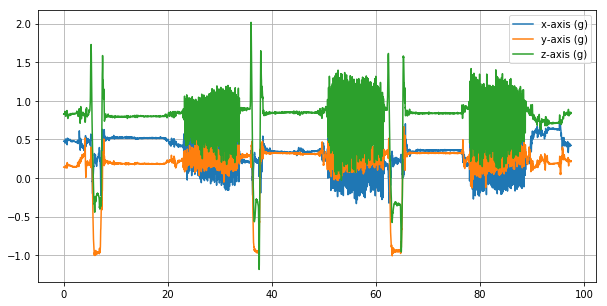

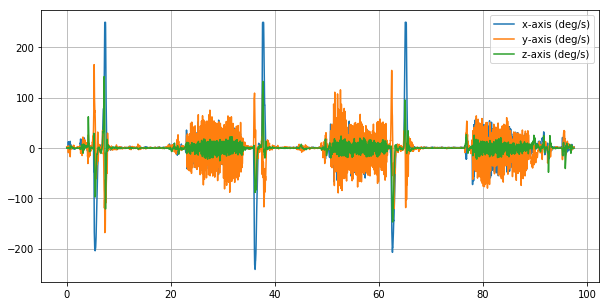

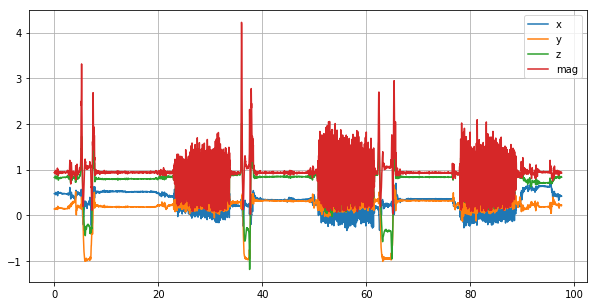

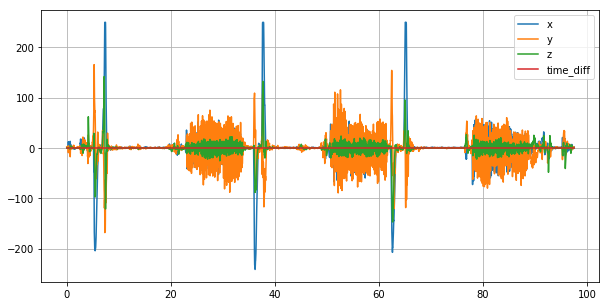

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Preview data
for df in [accel_df, gyro_df, accel_mat, gyro_mat]:
    fig, ax = plt.subplots(1, figsize = (10, 5))
    
    for t in [1, 2, 3, 4]:
        try:
            ax.plot(df.loc[:, df.columns[0]], df.loc[:, df.columns[t]])
        except:
            True
    
    ax.grid()
    ax.legend()
    
    plt.show()

In [7]:
# Add '[x y z]' vector
for df in [accel_df, gyro_df]:
    df['xyz_local'] = df.apply(lambda x : (x[1], x[2], x[3]), axis = 1)
    
# Add 'C' 3x3 matrix


In [8]:
# Summary
for df in [accel_df, gyro_df]:
    print(df.columns)
    print(df.shape)
    print()

Index(['elapsed (s)', 'x-axis (g)', 'y-axis (g)', 'z-axis (g)', 'xyz_local'], dtype='object')
(4908, 5)

Index(['elapsed (s)', 'x-axis (deg/s)', 'y-axis (deg/s)', 'z-axis (deg/s)',
       'xyz_local'],
      dtype='object')
(4908, 5)



In [9]:
# accel_df